# Projeto 2 
## Grupo : Felipe Lacombe e Fernando Bichuette 

**Problema:** Hoje em dia o mercado de trabalho está mais dinamico, grandes milionários e bilionários pelo mundo obteram suas riquesas sem terem cursado ou terminado o terceiro grau (faculdade) mais mesmo assim conseguiram sucesso financeiro, empresas com o Google, Apple e IBM não exigem mais diploma universitário para contratar novos funcionarios. Tendo em vista isso o grupo teve uma pergunta em mente, será que o nivel de escolaridade não tem mais relação com a pessoa ter uma chance maior de perder o emprego?     

**Pergunta :** O nivel de escolaridade afeta a chance de uma pessoa perder o emprego?

In [1]:
#importando as bibliotecas 
%matplotlib inline
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import statsmodels.formula.api as smf
from scipy import stats
from matplotlib.gridspec import GridSpec
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#Importando o dataset desemprego por escolaridade
desemprego_por_escolaridade = pd.read_csv("oecd.csv")
desemprego_por_escolaridade.drop(['INDICATOR','MEASURE','FREQUENCY','Flag Codes'], axis=1, inplace=True)
desemprego_por_escolaridade.head()

,LOCATION,SUBJECT,TIME,Value
0,DEU,BUPPSRY,1997,16.671282
1,DEU,BUPPSRY,1998,16.517719
2,DEU,BUPPSRY,1999,15.599174
3,DEU,BUPPSRY,2000,13.665389
4,DEU,BUPPSRY,2001,13.515862


In [3]:
#Importando o dataset desemprego total no ano
desemprego= pd.read_excel('desemprego_total.xls')
desemprego.drop(['Indicator Name','Indicator Code','Country Name'], axis=1, inplace=True)
desemprego.head()

,Country Code,YEARS,"Unemployment, total (% of total labor force)"
0,DEU,1997,9.863
1,DEU,1998,9.788
2,DEU,1999,8.855
3,DEU,2000,7.917
4,DEU,2001,7.773


In [4]:
#Cruza as duas tabelas
dados=desemprego_por_escolaridade.merge(desemprego, left_on=['LOCATION','TIME'], right_on=['Country Code','YEARS'], how='right')
dados.drop(['YEARS','Country Code'], axis=1, inplace=True)
dados.head()

,LOCATION,SUBJECT,TIME,Value,"Unemployment, total (% of total labor force)"
0,DEU,BUPPSRY,1997,16.671282,9.863
1,DEU,TRY,1997,5.675586,9.863
2,DEU,UPPSRY_NTRY,1997,9.960859,9.863
3,DEU,BUPPSRY,1998,16.517719,9.788
4,DEU,TRY,1998,5.458795,9.788


In [5]:
#Renomeando o dataset para mais facil compreensão 
dados.rename(columns={'SUBJECT':'Escolaridade','Unemployment, total (% of total labor force)':'Desemprego'}, inplace=True)
dados["Escolaridade"]= dados["Escolaridade"].str.replace("BUPPSRY", "Prim_sem_Secun", case = False)
dados["Escolaridade"]=dados["Escolaridade"].str.replace("UPPSRY_NTRY", "Com_Secun_sem_superior", case = False) 
dados["Escolaridade"]=dados["Escolaridade"].str.replace("TRY", "Com_ens_superior", case = False) 
dados["LOCATION"]=dados["LOCATION"].str.replace("DEU", "Alem", case = False)
dados["LOCATION"]=dados["LOCATION"].str.replace("USA", "Eua", case = False)
dados["LOCATION"]=dados["LOCATION"].str.replace("KOR", "Coreia", case = False)
dados.head()

,LOCATION,Escolaridade,TIME,Value,Desemprego
0,Alem,Prim_sem_Secun,1997,16.671282,9.863
1,Alem,Com_ens_superior,1997,5.675586,9.863
2,Alem,Com_Secun_sem_superior,1997,9.960859,9.863
3,Alem,Prim_sem_Secun,1998,16.517719,9.788
4,Alem,Com_ens_superior,1998,5.458795,9.788


C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


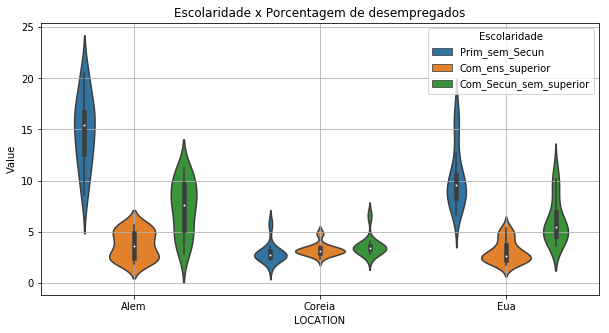

In [7]:
#Fasendo um violinplot 
#1° analise exploratoria
plt.figure(1, figsize=(10,5))

sns.violinplot(
    data=dados,
    x="LOCATION",
    y='Value',
    hue='Escolaridade',
    kind='box',
    height=50, 
    aspect=50) 
plt.title('Escolaridade x Porcentagem de desempregados')
plt.grid(True)
plt.show()

**1° analize exploratoria:** Após os processos de limpeza dos dois datasets e a sua junção, foi feito um violin plot com os dados de desemprego por escolaridade ao longo de 21 anos nos três paises escolhidos. O grafico mostra algumas coisas bem interessantes. 

Se olharmos para Correia sozinha podemos ver que existe pouca variabilidade entre as  

In [ ]:
#Separando os paises
Alemanha = dados.loc[(dados['LOCATION'])=="Alem"]  
Eua=dados.loc[(dados['LOCATION'])=='Eua']
Coreia=dados.loc[(dados['LOCATION'])=='Coreia']

In [ ]:
Alem1997=Alemanha.loc[(Alemanha['TIME'])==1997]
Alem2007=Alemanha.loc[(Alemanha['TIME'])==2007]
Alem2017=Alemanha.loc[(Alemanha['TIME'])==2017]

Eua1997=Eua.loc[(Eua['TIME'])==1997]
Eua2007=Eua.loc[(Eua['TIME'])==2007]
Eua2017=Eua.loc[(Eua['TIME'])==2017]

Coreia1997=Coreia.loc[(Coreia['TIME'])==1997]
Coreia2007=Coreia.loc[(Coreia['TIME'])==2007]
Coreia2017=Coreia.loc[(Coreia['TIME'])==2017]


plt.figure(1, figsize=(20,20))
the_grid = GridSpec(4, 4)

#Alemanha
ax1 = plt.subplot(the_grid[0, 0], aspect=1, title="Desempego na Alemanha em 1997")
Alem1997.plot(kind='pie', y = 'Value', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem1997['Escolaridade'], legend = False, fontsize=9)


ax2 = plt.subplot(the_grid[0, 1], aspect=1, title="Desempego na Alemanha em 2007")
Alem2007.plot(kind='pie', y = 'Value', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem2007['Escolaridade'], legend = False, fontsize=10)


ax3 = plt.subplot(the_grid[0, 2], aspect=1, title="Desempego na Alemanha em 2017")
Alem2017.plot(kind='pie', y = 'Value', ax=ax3, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem2017['Escolaridade'], legend = False, fontsize=10)

#Eua
ax4 = plt.subplot(the_grid[1, 0], aspect=1, title="Desempego na Eua em 1997")
Eua1997.plot(kind='pie', y = 'Value', ax=ax4, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua1997['Escolaridade'], legend = False, fontsize=10)


ax5 = plt.subplot(the_grid[1, 1], aspect=1, title="Desempego na Eua em 2007")
Eua2007.plot(kind='pie', y = 'Value', ax=ax5, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua2007['Escolaridade'], legend = False, fontsize=10)


ax6 = plt.subplot(the_grid[1, 2], aspect=1, title="Desempego na Eua em 2017")
Eua2017.plot(kind='pie', y = 'Value', ax=ax6, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua2017['Escolaridade'], legend = False, fontsize=10)

#Coreia
ax7 = plt.subplot(the_grid[2, 0], aspect=1, title="Desempego na Coreia em 1997")
Coreia1997.plot(kind='pie', y = 'Value', ax=ax7, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia1997['Escolaridade'], legend = False, fontsize=10)


ax8 = plt.subplot(the_grid[2, 1], aspect=1, title="Desempego na Coreia em 2007")
Coreia2007.plot(kind='pie', y = 'Value', ax=ax8, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia2007['Escolaridade'], legend = False, fontsize=10)


ax9 = plt.subplot(the_grid[2, 2], aspect=1, title="Desempego na Coreia em 2017")
Coreia2017.plot(kind='pie', y = 'Value', ax=ax9, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia2017['Escolaridade'], legend = False, fontsize=10)
plt.show()




In [ ]:
plt.plot(Alemanha["TIME"],Alemanha['Desemprego'],label='Alemanha')
plt.plot(Eua["TIME"],Eua['Desemprego'],label='EUA')
plt.plot(Coreia["TIME"],Coreia['Desemprego'],label='Coreia')
plt.legend()
plt.grid()
plt.show()

In [ ]:
dados = pd.get_dummies(dados, columns=['LOCATION','Escolaridade'])
dados.head()

In [ ]:
y=dados["Value"]
x=dados.drop('Value',axis=1)

y.head()

In [ ]:
x.head()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=152)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
# Fazendo regressão linear
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

print(np.mean((y_test-y_pred)**2))
print(mean_absolute_error(y_test,y_pred))
print('Acurácia da regressao:',linreg.score(x_test,y_test))

In [ ]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
model = RandomForestRegressor(n_estimators = 500, random_state=152) 
  
# fit the regressor with x and y data 
model.fit(x_train,y_train) 

Y_pred = model.predict(x_test)
print(mean_squared_error(y_test,Y_pred))
print(mean_absolute_error(y_test,Y_pred))
print('Acurácia da regressao:',model.score(x_test,y_test)) #R²

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=152)
reg.fit(x_train,y_train)
Grad_pred=reg.predict(x_test)

print(mean_squared_error(y_test,Grad_pred))
print(mean_absolute_error(y_test,Grad_pred))
print('Acurácia da regressao:',reg.score(x_test,y_test)) #R²